<a name = "inicio"></a>
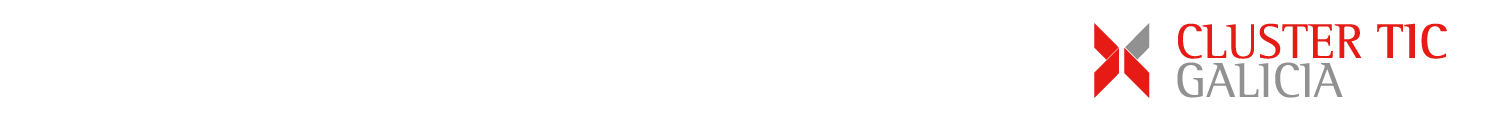

<div style="font-size: 50px;text-align: center;height:70px;padding:10px;margin:10px 0 0 0;">Introducción</div>

1. [Nomenclatura](#Nomenclatura)
1. [Interfaces de programación](#Interfaces-de-programación)

**Matplotlib** es la librería de visualización más popular de Python. Su primera versión se remonta al año 2003, y esto puede ser considerado a la vez tanto una fortaleza como una debilidad. Es cierto que, con el tiempo, Matplotlib se ha instaurado como la librería de visualización de referencia y, de hecho, otras muchas librerías han desarrollado sus herramientas de visualización sobre Matplotlib, siendo Seaborn el caso más destacado. De hecho, incluso Pandas basa en matplotlib sus herramientas de visualización (los DataFrames poseen el método *plot* importado de matplotlib que permite crear y personalizar con cierta facilidad una gráfica con los datos contenidos en el DataFrame). Pero también es cierto que, con el paso de los años, Matplotlib ha sido superada por otras librerías (la mencionada Seaborn, ggplot, Bokeh, Plotly) que ofrecen visualizaciones más atractivas o unas interfaces más coherentes y amigables. En cualquier caso, es esa dependencia que tienen muchas librerías con respecto a Matplotlib lo que hace más que conveniente el conocimiento de Matplotlib: las librerías de más alto nivel diseñadas sobre ésta no siempre ofrecen toda la funcionalidad que necesitamos y, cuando queremos afinar en el diseño de una visualización, frecuentemente no nos queda más remedio que acudir directamente a Matplotlib.

Otra de las fortalezas de Matplotlib es su compatibilidad con diferentes sistemas operativos y entornos en los que se ejecuta, lo que ayudó a su rápida adopción por parte de la comunidad.

De lo dicho que deduce que Matplotlib es una librería de bajo nivel, muy potente y extensa pero que puede resultar un tanto confusa al principio. Ofrece herramientas para la creación de visualizaciones en 2D, aunque se completa con el uso de otros add-ons que permiten la generación de gráficas 3D, por ejemplo.

Podemos acceder a la documentación completa en el sitio web oficial de Matplotlib:

https://matplotlib.org/

La mayoría de las funciones de Matplotlib están localizadas en la sublibrería *pyplot*, que suele importarse con el alias **plt**:

In [1]:
import matplotlib.pyplot as plt

En ocasiones podemos encontrarnos con la necesidad de trabajar directamente con la librería *matplotlib*, que suele importarse con el alias **mpl**:

In [2]:
import matplotlib as mpl

Además de importar Matplotlib vamos a importar también la librería **NumPy** -la utilizaremos con sencillos arrays y para generar conjuntos de datos aleatorios-, y vamos a fijar una semilla para el generador de números aleatorios de esta librería.

In [3]:
import numpy as np

In [4]:
generator = np.random.Generator(np.random.PCG64(seed = 0))

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Nomenclatura

Aunque resultaría posible comenzar a generar gráficas con la función [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), resulta mucho más conveniente comenzar revisando qué ocurre cuando generamos una gráfica de ese u otro modo. Veamos el resultado de una visualización típica:

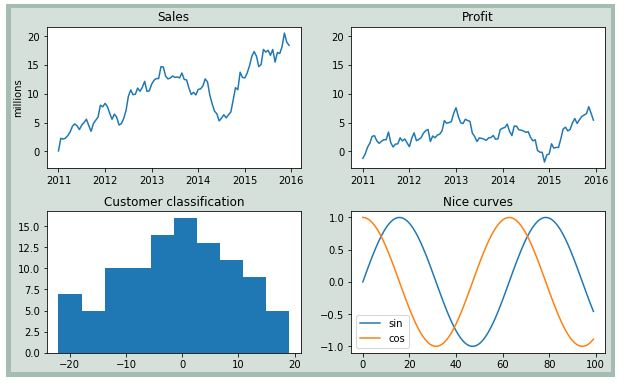

En esta imagen vemos cómo hemos generado 4 sencillas gráficas dispuestas en una matriz de 2x2. Pues bien, el primero de los conceptos a aprender es el de *figura* (*figure* en inglés). Ésta es el espacio que abarca las cuatro gráficas y que, en este ejemplo, se muestra de color verdoso con un borde verde un poco más fuerte. Es decir, en la imagen anterior, la figura sería la siguiente:

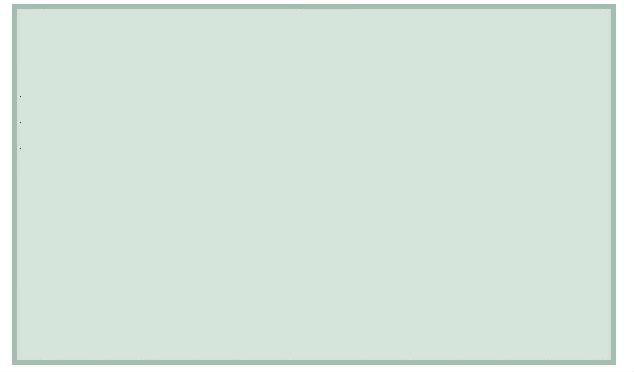

Dentro de la figura nos encontramos con las cuatro mencionadas gráficas, cada una de las cuales se ha creado sobre un *conjunto de ejes* (*axes* en inglés). Se muestran a continuación los cuatro conjuntos de ejes:

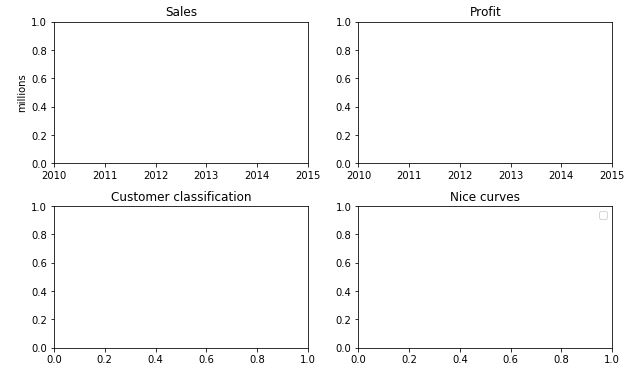

Vemos que del concepto "ejes" no dependen solo lo que, desde un punto de vista puramente matemático, calificaríamos de "ejes" (las líneas ortogonales que definen las referencias para las dos dimensiones involucradas), sino también cosas como el título de la gráfica, las marcas en los ejes (lo que en Matplotlib se denominan *ticks*), etc. Obsérvese que hablamos de "conjuntos de ejes", en plural, tal y como se hace en la documentación original: Por lo tanto, podríamos decir que en la imagen de este ejemplo tenemos cuatro conjuntos de ejes. Veremos más adelantes que en Matplotlib también existe el concepto de "eje" en singular ("*axis*").

Por último, dentro de cada conjunto de ejes encontramos lo que vamos a llamar "gráficas" o "trazas" (referido con el nombre de *plot* en la literatura en inglés). Estas serían las cuatro gráficas generadas:

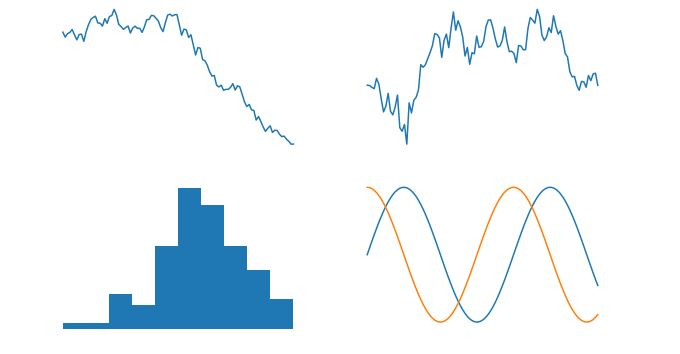

Del concepto de "gráfica" dependen cosas como el color de la misma, el ancho de la línea usada, etc.

Pues bien, la primera conclusión a extraer es que, para crear una gráfica es necesario crear una figura y, al menos, un conjunto de ejes. Solo cuando tenemos ambos objetos creados, es posible crear la gráfica.

### La función plot

Y hay diferentes formas de crear una figura y un conjunto de ejes. Así, por ejemplo, la función [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) crea de forma automática una figura y un conjunto de ejes y muestra la gráfica correspondiente a los datos que le hemos pasado como argumentos

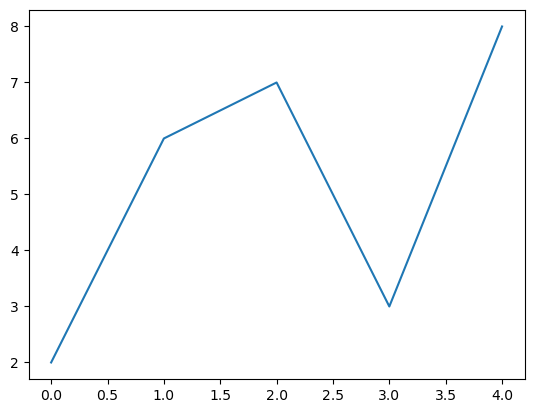

In [5]:
plt.plot([2, 6, 7, 3, 8])
plt.show()

(como veremos más adelante, [matplotlib.pyplot.show](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) muestra la gráfica creada, aunque su comportamiento exacto dependerá del entorno en el que la estemos creando).

Este método, por muy sencillo que parezca, es el que nos ofrece la menor capacidad de personalización.

### La función subplots

Otra opción es utilizar la función [matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) para crear una figura y uno o más conjuntos de ejes (por defecto se crea uno solo):

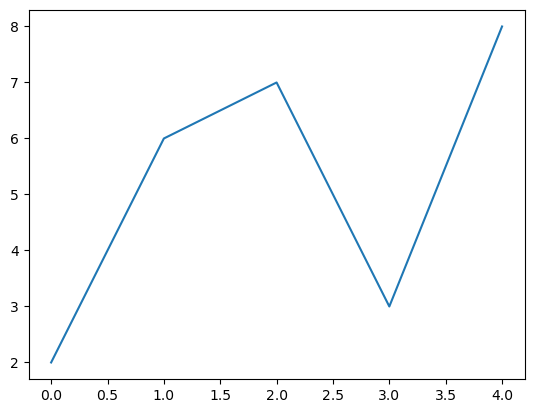

In [6]:
fig, ax = plt.subplots()
ax.plot([2, 6, 7, 3, 8])
plt.show()

Vemos cómo la función devuelve una referencia a la figura y otra al conjunto de ejes. En este ejemplo se ha creado solo un conjunto de ejes, por lo que la variable *ax* almacena una referencia a ellos. Si se hubiesen creado más de un conjunto de ejes, la variable *ax* sería un array NumPy conteniendo referencias a cada uno de los ejes. Veremos esto con más profundidad un poco más adelante.

### Las funciones figure y axes

Un tercer método (hay otros) sería utilizar la función [matplotlib.pyplot.figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) para crear de forma explícita una figura, y la función [matplotlib.pyplot.axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axes.html) para crear de forma explícita un conjunto de ejes en la última figura que se haya creado o referenciado (lo que se denomina la "figura actual").

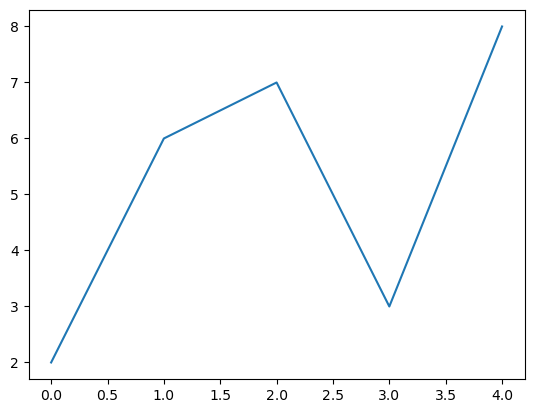

In [7]:
fig = plt.figure()
ax = plt.axes()
ax.plot([2, 6, 7, 3, 8])
plt.show()

En función del método usado dispondremos de más o menos herramientas para personalizar nuestra visualización. A lo largo de las próximas secciones veremos las más importantes.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Interfaces de programación

Un tema que suele confundir al usuario de Matplotlib es la variedad de métodos que hay para conseguir un objetivo. Y es que Matplotlib ofrece dos interfaces de programación (digamos, dos estilos distintos para crear y personalizar las gráficas): un estilo denominado "MATLAB" (pues se asemeja a la interfaz de este software) y otro denominado "orientado a objetos".

### Interfaz estilo MATLAB

Python fue desarrollado como una alternativa a MATLAB para usuarios de Python, y esto queda en evidencia cuando analizamos el conjunto de herramientas ofrecidas en este estilo de programación. La mayor parte de estas herramientas se ofrecen como funciones de la sublibrería *pyplot* (que hemos importado con el alias *plt*). Veamos un ejemplo:

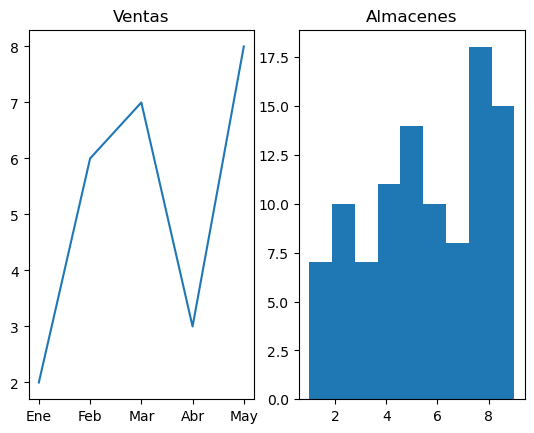

In [8]:
plt.figure()
plt.subplot(1, 2, 1)
plt.plot([2, 6, 7, 3, 8])
plt.title("Ventas")
plt.xticks(range(0,5), ["Ene", "Feb", "Mar", "Abr", "May"])
plt.subplot(1, 2, 2)
plt.hist(np.random.randint(1, 10, 100), bins = 9)
plt.title("Almacenes")
plt.show()

Estas dos gráficas se han creado usando funciones de *matplotlib.pyplot*. Es importante destacar que una vez que se ha personalizado el primer conjunto de ejes y la primera gráfica (la de la izquierda) y hemos comenzado a crear el segundo conjunto de ejes (el del histograma de la derecha), ya no hay forma de modificar nada de la primera gráfica, pues Matplotlib mantiene lo que podemos denominar unos "ejes actuales" y, una vez se crea el segundo conjunto de ejes, esos "ejes actuales" pasan a ser los nuevos y, usando esta interfaz, no hay forma alguna de volver a referenciar los anteriores.

### Interfaz orientada a objetos (OO)

Utilizando este segundo estilo, vamos a referenciar a la figura y a los ejes mediante variables y serán métodos y atributos de estas variables los que nos permitirán personalizar la visualización. Por ejemplo, el código equivalente a la figura anterior sería el siguiente:

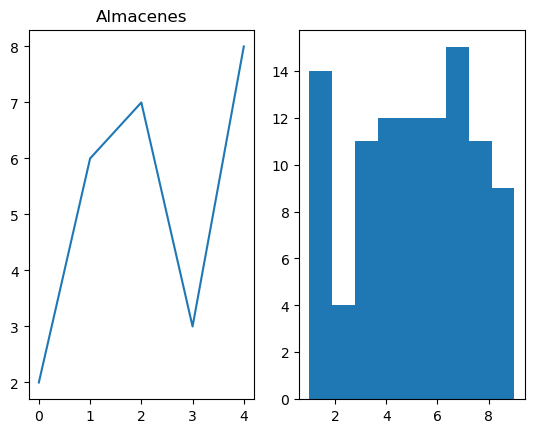

In [9]:
fig, ax = plt.subplots(1, 2)
ax[0].plot([2, 6, 7, 3, 8])
ax[0].set_title("Ventas")
ax[0].set_xticks(range(0,5), minor = ["Ene", "Feb", "Mar", "Abr", "May"])
ax[1].hist(generator.integers(1, 10, 100), bins = 9)
ax[0].set_title("Almacenes")
plt.show()

En este caso, las variables *fig* y *ax* nos servirán para personalizar todas las gráficas a crear en la figura. Vemos que las únicas funciones que hemos utilizado has sido la primera, **plt.subplots()**, para crear la figura y los dos conjuntos de ejes, y **plt.show()**, y el resto de instrucciones son métodos que ejecutamos sobre los objetos *fig* y *ax*.

La mayor parte de los métodos que nos permiten fijar un valor a un atributo comienza por "*set_*". Estos métodos suelen tener un método equivalente que comienza habitualmente por "*get_*" que sirve para leer el valor de dicho atributo.

Este segundo estilo orientado a objetos nos da mayor control sobre las visualizaciones que creemos. En el resto de la documentación utilizaremos ambos enfoques, especificando -allí donde se considere apropiado- la forma en la que cada uno de los estilos obtiene un objetivo.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>